In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [135]:
train = pd.read_csv('F:\Programing app\Analytics vidya project\Black friday sales prediction/train.csv')
test = pd.read_csv('F:\Programing app\Analytics vidya project\Black friday sales prediction/test.csv')

In [136]:
train_original = train.copy()
test_original = test.copy()


In [137]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [138]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [139]:
test.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [140]:
train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

Purchase column is a Target Variable.

In [141]:
train.shape, test.shape

((550068, 12), (233599, 11))

In [142]:
train.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

**Exploratory Data Analysis**

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

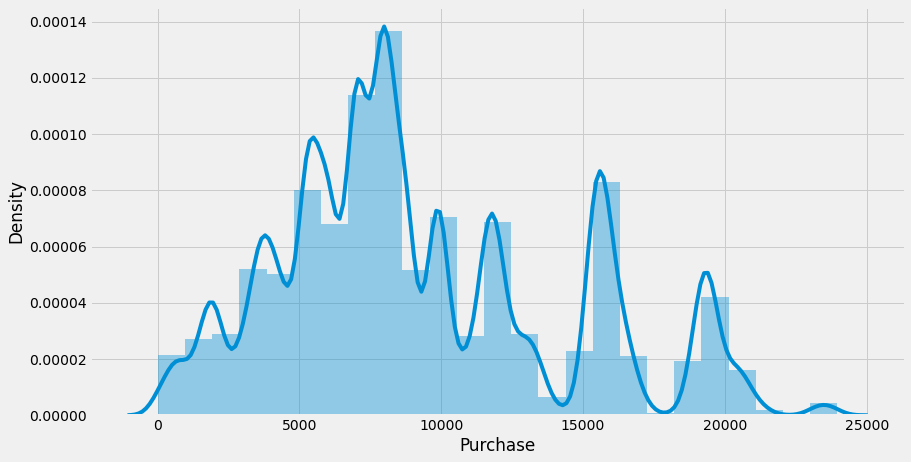

In [143]:
#distplot for purchase(Target variable)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
sns.distplot(train['Purchase'], bins=25)

<AxesSubplot:xlabel='Gender', ylabel='count'>

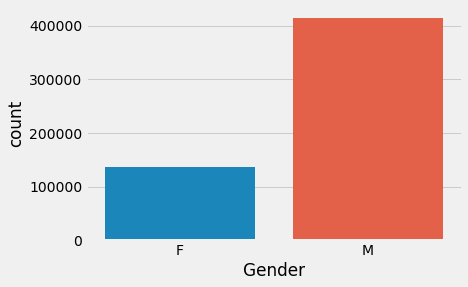

In [144]:
#distrubution of numeric variables
sns.countplot(train['Gender'])

<AxesSubplot:xlabel='Age', ylabel='count'>

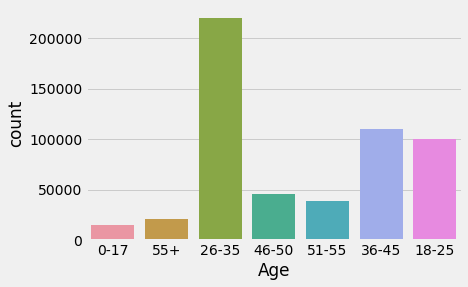

In [145]:
sns.countplot(train['Age'])

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

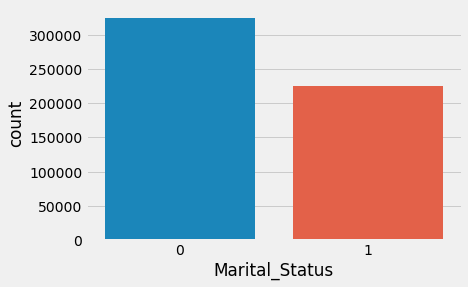

In [147]:
sns.countplot(train['Marital_Status'])

<AxesSubplot:xlabel='Occupation', ylabel='count'>

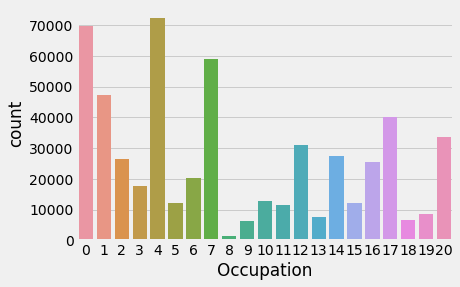

In [148]:
sns.countplot(train['Occupation'])

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

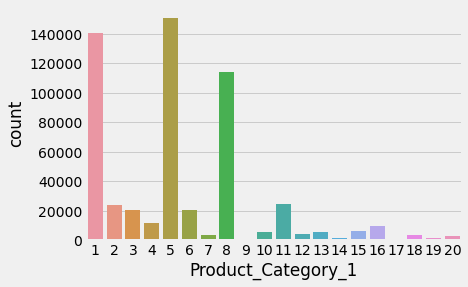

In [149]:
sns.countplot(train['Product_Category_1'])

<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

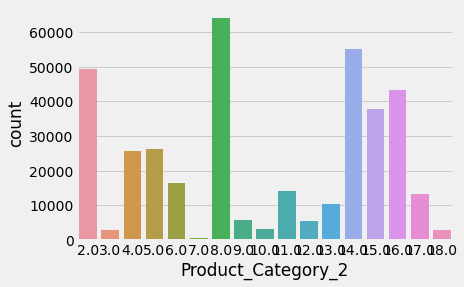

In [150]:
sns.countplot(train['Product_Category_2'])

<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

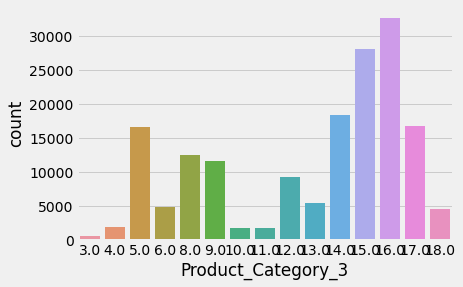

In [151]:
sns.countplot(train['Product_Category_3'])

<AxesSubplot:xlabel='City_Category', ylabel='count'>

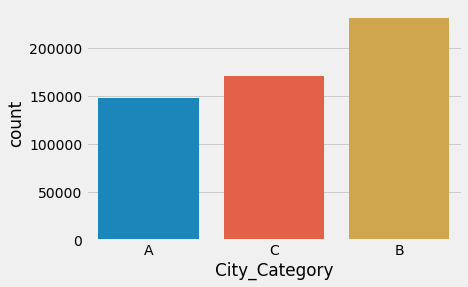

In [152]:
sns.countplot(train['City_Category'])

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

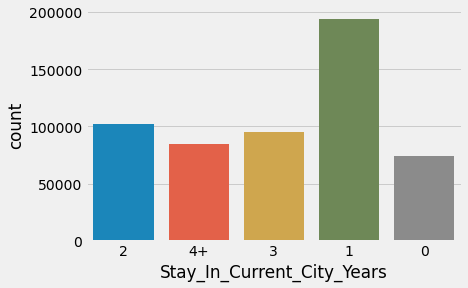

In [153]:
sns.countplot(train['Stay_In_Current_City_Years'])

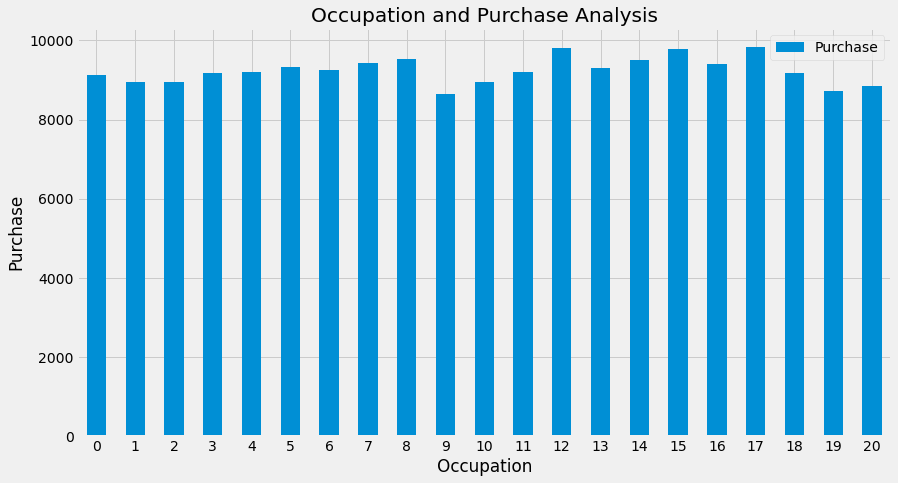

In [154]:
#bivariate analysis
occupation_plot = train.pivot_table(index='Occupation', values="Purchase", aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(13,7))
plt.xlabel('Occupation')
plt.ylabel('Purchase')
plt.title('Occupation and Purchase Analysis')
plt.xticks(rotation=0)
plt.show()

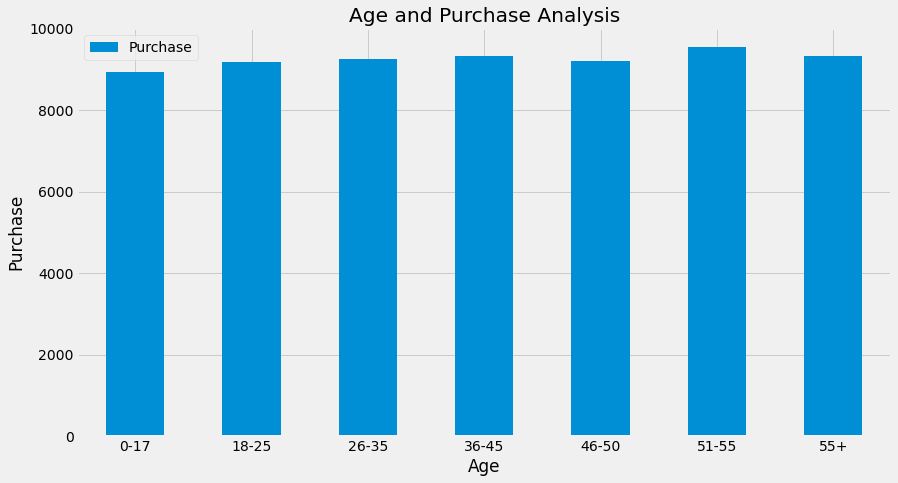

In [155]:
age_plot = train.pivot_table(index='Age', values="Purchase", aggfunc=np.mean)
age_plot.plot(kind='bar', figsize=(13,7))
plt.xlabel('Age')
plt.ylabel('Purchase')
plt.title('Age and Purchase Analysis')
plt.xticks(rotation=0)
plt.show()

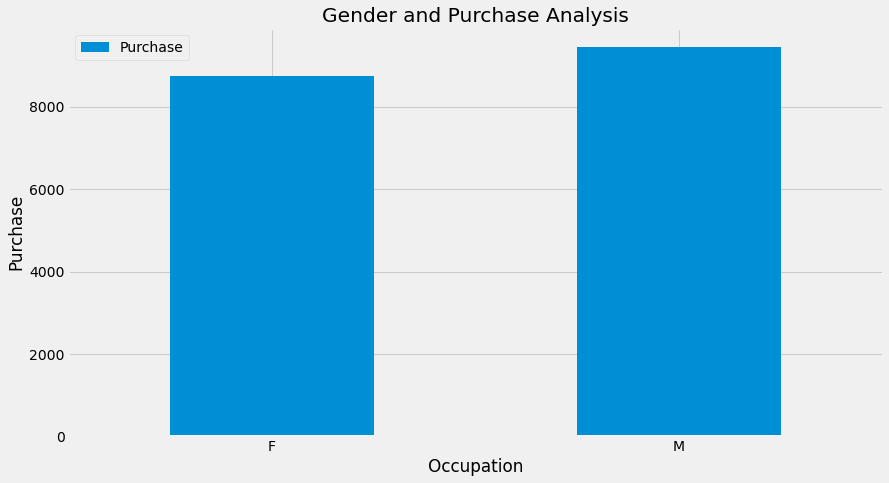

In [156]:
Gender_plot = train.pivot_table(index='Gender', values="Purchase", aggfunc=np.mean)
Gender_plot.plot(kind='bar', figsize=(13,7))
plt.xlabel('Occupation')
plt.ylabel('Purchase')
plt.title('Gender and Purchase Analysis')
plt.xticks(rotation=0)
plt.show()

**Preprocessing the dataset**

In [157]:
#chech for null values
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [158]:
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [159]:
train['Product_Category_2'] = train['Product_Category_2'].fillna(-2.0).astype('float32')
test['Product_Category_2'] = test['Product_Category_2'].fillna(-2.0).astype('float32')
train['Product_Category_3'] = train['Product_Category_3'].fillna(-2.0).astype('float32')
test['Product_Category_3'] = test['Product_Category_3'].fillna(-2.0).astype('float32')

In [160]:
train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [161]:
test.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [162]:
#encoding values using dict.
gender_dict = {'F':0, 'M':1}
train['Gender'] = train['Gender'].apply(lambda x: gender_dict[x])
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,-2.0,-2.0,7969


In [163]:
test['Gender']= test['Gender'].apply(lambda x: gender_dict[x])
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,1,46-50,7,B,2,1,1,11.0,-2.0
1,1000009,P00113442,1,26-35,17,C,0,0,3,5.0,-2.0
2,1000010,P00288442,0,36-45,1,B,4+,1,5,14.0,-2.0
3,1000010,P00145342,0,36-45,1,B,4+,1,4,9.0,-2.0
4,1000011,P00053842,0,26-35,1,C,1,0,4,5.0,12.0


In [164]:
#to improve the metric use one hot encoding
#label encodig
cols = ['Age', 'City_Category', 'Stay_In_Current_City_Years']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    train[col] = le.fit_transform(train[col])
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,-2.0,-2.0,7969


In [165]:
for col in cols:
    test[col] = le.fit_transform(test[col])
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,1,4,7,1,2,1,1,11.0,-2.0
1,1000009,P00113442,1,2,17,2,0,0,3,5.0,-2.0
2,1000010,P00288442,0,3,1,1,4,1,5,14.0,-2.0
3,1000010,P00145342,0,3,1,1,4,1,4,9.0,-2.0
4,1000011,P00053842,0,2,1,2,1,0,4,5.0,12.0


<AxesSubplot:>

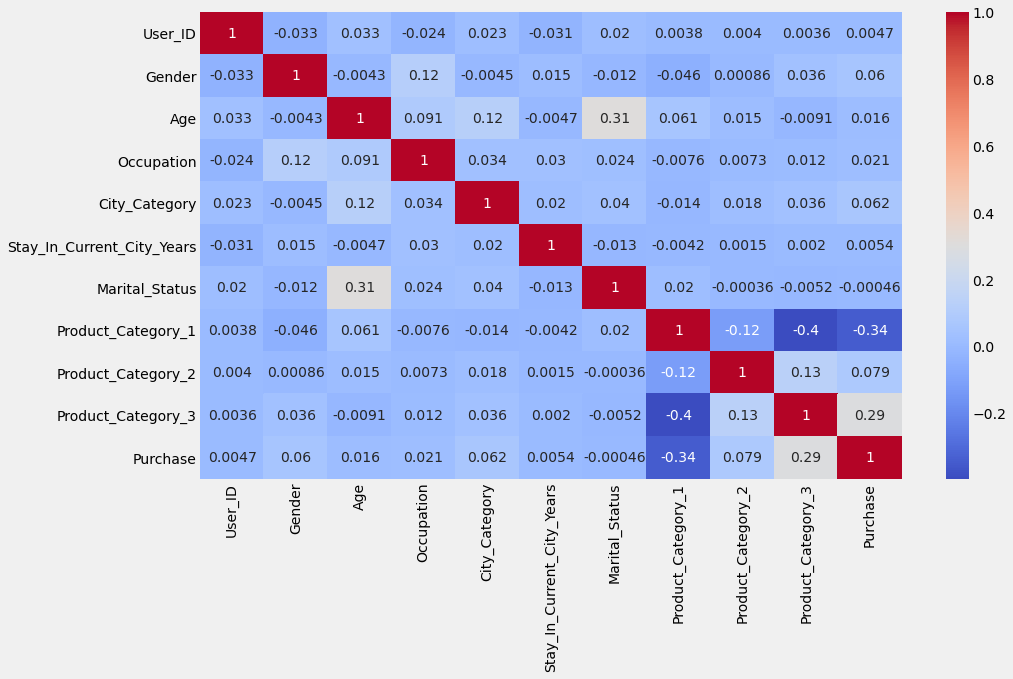

In [166]:
corr = train.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

**Input split**

In [167]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,-2.0,-2.0,7969


In [168]:
X = train.drop(columns =['User_ID', 'Product_ID', 'Purchase'])
y = train['Purchase']

**Model Training**

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
X_train, X_cv, y_train, y_cv =train_test_split(X, y, test_size=0.3)

In [171]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [172]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [173]:
pred_cv = model.predict(X_cv)

In [174]:
r2_score(y_cv, pred_cv)

0.1522017783497962

In [175]:
np.sqrt(mean_squared_error(y_cv, pred_cv))

4624.116157944934

In [176]:
test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,1,4,7,1,2,1,1,11.0,-2.0
1,1000009,P00113442,1,2,17,2,0,0,3,5.0,-2.0
2,1000010,P00288442,0,3,1,1,4,1,5,14.0,-2.0
3,1000010,P00145342,0,3,1,1,4,1,4,9.0,-2.0
4,1000011,P00053842,0,2,1,2,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,0,2,15,1,4,1,8,-2.0,-2.0
233595,1006036,P00254642,0,2,15,1,4,1,5,8.0,-2.0
233596,1006036,P00031842,0,2,15,1,4,1,1,5.0,12.0
233597,1006037,P00124742,0,4,1,2,4,0,10,16.0,-2.0


In [178]:
submission = pd.read_csv('F:\Programing app\Analytics vidya project\Black friday sales prediction/sample_submission_V9Inaty.csv')

In [179]:
submission

,Purchase,User_ID,Product_ID
0,100,1000004,P00128942
1,100,1000009,P00113442
2,100,1000010,P00288442
3,100,1000010,P00145342
4,100,1000011,P00053842
...,...,...,...
233594,100,1006036,P00118942
233595,100,1006036,P00254642
233596,100,1006036,P00031842
233597,100,1006037,P00124742


In [186]:
pred_test

array([10125.95917803,  9937.67720133,  8274.0218922 , ...,
       11664.56076649,  7051.29974969,  8578.63914241])

In [180]:
submission['Purchase'] = pred_test

In [181]:
submission['User_ID'] = test_original['User_ID']
submission['Product_ID'] = test_original['Product_ID']

In [182]:
submission

,Purchase,User_ID,Product_ID
0,10125.959178,1000004,P00128942
1,9937.677201,1000009,P00113442
2,8274.021892,1000010,P00288442
3,8617.502203,1000010,P00145342
4,11047.978137,1000011,P00053842
...,...,...,...
233594,7260.719679,1006036,P00118942
233595,8291.160612,1006036,P00254642
233596,11664.560766,1006036,P00031842
233597,7051.299750,1006037,P00124742


In [183]:
pd.DataFrame(submission, columns = ['Purchase', 'User_ID', 'Product_ID']).to_csv('LinearRegression4.csv', index=False)

In [190]:
from sklearn.tree import DecisionTreeRegressor
model =DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [191]:
pred_cv = model.predict(X_cv)

In [192]:
np.sqrt(mean_squared_error(y_cv, pred_cv))

3368.2483768135994

In [197]:
test = test.drop(columns = ['User_ID', 'Product_ID'])
test.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1,4,7,1,2,1,1,11.0,-2.0
1,1,2,17,2,0,0,3,5.0,-2.0
2,0,3,1,1,4,1,5,14.0,-2.0
3,0,3,1,1,4,1,4,9.0,-2.0
4,0,2,1,2,1,0,4,5.0,12.0


In [198]:
pred_test = model.predict(test)

In [199]:
pred_test

array([15604., 10677.,  8293., ...,  7861., 18925.,  2502.])

In [201]:
submission['Purchase'] = pred_test

In [202]:
submission['User_ID'] = test_original['User_ID']
submission['Product_ID'] = test_original['Product_ID']

In [203]:
pd.DataFrame(submission, columns = ['Purchase', 'User_ID', 'Product_ID']).to_csv('DecisionTreeRegressor.csv', index=False)

In [204]:
from sklearn.metrics import mean_absolute_error

In [206]:
mean_absolute_error(y_cv, pred_cv)

2374.570877674432